In [64]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import statsmodels.formula.api as smf


In [65]:
dataset = pd.read_csv('/content/Salary_Data.csv')

In [66]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


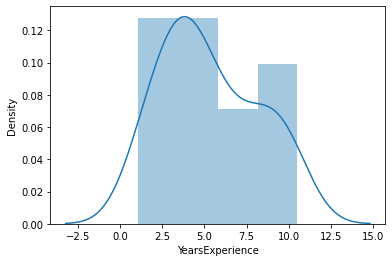

In [67]:
#Visualisation
sns.distplot(dataset['YearsExperience'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


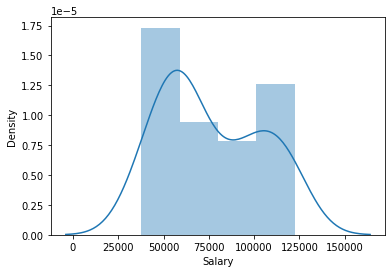

In [68]:
sns.distplot(dataset['Salary'])

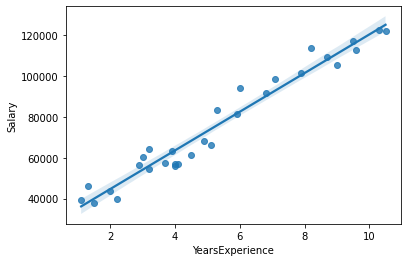

In [69]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

In [70]:
X=dataset.iloc[:,0].values
y=dataset.iloc[:,1].values

In [71]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [72]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =0)

In [74]:
model = smf.ols("Salary~YearsExperience",data = dataset).fit() #ordinary least squaring method

In [75]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [83]:
#Predict for 5 and 6 years of experience
newdata=pd.Series([5,6])
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
print(newdata)
print(data_pred)

0    5
1    6
dtype: int64
   YearsExperience
0                5
1                6


In [84]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [85]:
model.predict(data_pred)


0    73042.011806
1    82491.974127
dtype: float64

In [87]:
#model parameter
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [89]:
# Manually calculate for 5 and 6 years experience salary
Salary_5 = (25792.200199) + (9449.962321)*(5)
Salary_6 = (25792.200199) + (9449.962321)*(6)
print('5 years experience Salary - ', Salary_5)
print('6 years experience Salary - ', Salary_6)

5 years experience Salary -  73042.01180400001
6 years experience Salary -  82491.97412500001


Predicted value and calculated value are correct for 5 & 6 years experience salary
